# FBProphet

FbProphet is a powerful time series analysis package released by Core Data Science Team at Facebook. It is simple and easy to go package for performing time series analytics and forecasting at scale.

# Prophet

Prophet is a procedure for forecasting time series data based on an additive model where non-linear trends are fit with yearly, weekly, and daily seasonality, plus holiday effects. It works best with time series that have strong seasonal effects and several seasons of historical data. Prophet is robust to missing data and shifts in the trend, and typically handles outliers well.

Prophet uses a decomposable time series model with three main model components: trend, seasonality, and holidays. They are combined in the following equation:

   ###                                    y(t) = g(t) + s(t) + h(t) + e(t)

Here,

    g(t) is a trend function which models the non-periodic changes. It can be either a linear function or logistic function.

    s(t) represents a periodic changes i.e weekly, monthly, yearly. An yearly seasonal component is modeled using Fourier   series and weekly seasonal component using dummy variables.

    h(t) is a function that represents the effect of holidays which occur on irregular schedules.(n≥1 days)

    e(t) represents error changes that are not accommodated by the model

## Fbprophet advantage

(1) Large-scale, fine-grained data

Can perform large-scale prediction and give confidence intervals; data time granularity can be small, supporting hour, day, and month data.

(2) Automatic processing of missing value data

When there are missing data, other prediction methods need to be interpolated to fill the pre-processing, and fbprophet can handle the missing value data by itself.

(3) More flexible, support seasonal and holiday adjustments

Some of the mutation points are often caused by special holiday dates, and fbprophet supports the input of these dates and the time windows of the influences before and after the predictions.

(4) Trend prediction + trend decomposition

There are two trends in fitting: linear trends, logistic trends; there are many types of trend decomposition: Trend, year, week, day trend, and holiday effects.

(5) Model parameters are easy to explain

The model parameters are well understood, allowing analysts to adjust parameters based on business experience to enhance the accuracy of certain parts of the hypothesis, so that the model and business achieve the desired integration.

(6) Fast fitting speed

(7) Simple operation

Not only is the environment simple to build, but the entire forecasting process can be completed with just a dozen lines of code.

## Prophet () parameter description

 > growth: String 'linear' or 'logistic' to specify a linear or logistic trend. 'linear' or 'logistic' is used to       specify linear or logical curve trends'.  (default 'linear')

 > changepoints: If not specified, potential changepoints are selected automatically. Specify potential change points.  If not specified, potential change points will be automatically selected. example: changepoints=['2014-01-01'] specifies that 2014-01-01 is a potential changepoint. (default None)

 > n_changepoints: This is the number of automatically placed changepoints. The default of 25 should be plenty to capture the trend changes in a typical time series (at least the type that Prophet would work well on anyway). Rather than increasing or decreasing the number of changepoints, it will likely be more effective to focus on increasing or decreasing the flexibility at those trend changes, which is done with changepoint_prior_scale.

 > changepoint_range: Proportion of history in which trend changepoints will be estimated. Defaults to 0.8 for the first 80%. Not used if 'changepoints' is specified. Not used if input 'changepoints' is supplied. Estimate the historical proportion of the trend change point. Not used if 'changepoints' is specified. (default 0.8)

 > yearly_seasonality: Fit yearly seasonality.Can be 'auto', True, False, or a number of Fourier terms to generate. Specify whether to analyze the annual seasonality of the data. If True, the default Fourier item is 10, and finally output. The yearly_trend, yearly_upper, yearly_lower and other data. (default auto)

 > weekly_seasonality: Fit yearly seasonality.Can be 'auto', True, False, or a number of Fourier terms to generate. Specify whether to analyze the weekly seasonality of the data. If True, the default is to use the Fourier item 10, and finally output, weekly_trend , weekly_upper, weekly_lower and other data. (default auto)

 > daily_seasonality: Fit daily seasonality.Can be 'auto', True, False, or a number of Fourier terms to generate. Specify whether to analyze the seasonality of the data. If True, the default Fourier item is 10, and the final output will be Daily _trend, daily _upper, daily _lower and other data. (default auto)

 > holidays: pd.DataFrame with columns holiday (string) and ds (date type) and optionally columns lower_window and upper_window which specify a range of days around the date to be included as holidays.lower_window=-2 will include 2 days prior to the date as Holidays. Also optionally can have a column prior_scale specifies the prior scale for that holiday. The data in the pd.dataframe format is passed in. This data contains the holiday column (string) and ds (date type) and the optional columns lower_window and upper_window to specify that the date of the lower_window or upper_window is listed as a holiday. Lower_window=-2 will include the date of the previous 2 days as a holiday. (default None)

 > seasonality_mode: 'additive' (default) or 'multiplicative'. Seasonal model. (default additive)

 > seasonality_prior_scale: Larger values allow the model to fit larger seasonal fluctuations, smaller values dampen the seasonality. Can be specified for individual seasonalities using add_seasonality. Adjust the strength of seasonal components. The larger the value, the more the seasonal fluctuations will be accommodated, and the smaller the value, the more seasonal fluctuations will be suppressed. (default 10)

 > holidays_prior_scale: Parameter modulating the strength of the holiday components model, unless overridden in the holidays input. Adjusting the strength of the holiday model component. The larger the value, the greater the impact of the holiday on the model. The smaller the value, the smaller the impact of the holiday. (default 10)

 > changepoint_prior_scale: Parameter modulating the flexibility of the automatic changepoint selection. Large values will allow many changepoints, small values will allow few changepoints. Adjust the flexibility of the "changepoint" selection. The larger the value, the more "changepoints" are selected, which makes the model fit the historical data, but it also increases the risk of overfitting. (default 0.05)

 > mcmc_samples: Integer, if greater than 0, will do full Bayesian inference with the specified number of MCMC samples. If 0, will do MAP estimation.mcmc sample, used to obtain prediction of future uncertainty. If it is greater than 0, the full Bayesian inference of the mcmc sample will be made. If it is 0, the maximum a posteriori estimate will be made. (default 0)

 > interval_width: If mcmc_samples=0, this will be only the uncertainty in the trend using the MAP estimate of the extrapolated generative model. If mcmc.samples>0, this will be integrated over all Model parameters, which will include uncertainty in seasonality. It indicates the similarity between the frequency and amplitude of the trend interval used to predict the future and the historical data. The larger the value, the more similar. When mcmc_samples = 0, this parameter is only used to change the trend model. When mcmc_samples > 0, this parameter also includes the degree of seasonal trend change. (default 0.8)

 > uncertainty_samples: Number of simulated draws used to estimate uncertainty intervals. The number of simulated extracts used to estimate the uncertainty interval. (default 1000)

# Fbprophet Implementation

In [5]:
import pandas as pd
from fbprophet import Prophet
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Load data

In [6]:
from google.colab import drive
drive.mount('colab')

Mounted at colab


In [16]:
df = pd.read_csv('/content/colab/MyDrive/colab/DEOK_hourly.csv')

In [17]:
df.head()

,Datetime,DEOK_MW
0,1/1/2012 1:00,2533
1,1/1/2012 2:00,2465
2,1/1/2012 3:00,2364
3,1/1/2012 4:00,2313
4,1/1/2012 5:00,2279


it is a data of power used per hour in magawattes 

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35059 entries, 0 to 35058
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Datetime  35059 non-null  object
 1   DEOK_MW   35059 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 547.9+ KB


Here column 'Datetime' data type is object so we will convert it into datetime

In [19]:
df["Datetime"] = pd.to_datetime(df["Datetime"])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35059 entries, 0 to 35058
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Datetime  35059 non-null  datetime64[ns]
 1   DEOK_MW   35059 non-null  int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 547.9 KB


Prophet expects the dataset to have two columns named as ds and y. ds is the date column while y is the column that we are forecasting.

In [20]:
df.columns = ['ds','y']
df.head()

,ds,y
0,2012-01-01 01:00:00,2533
1,2012-01-01 02:00:00,2465
2,2012-01-01 03:00:00,2364
3,2012-01-01 04:00:00,2313
4,2012-01-01 05:00:00,2279


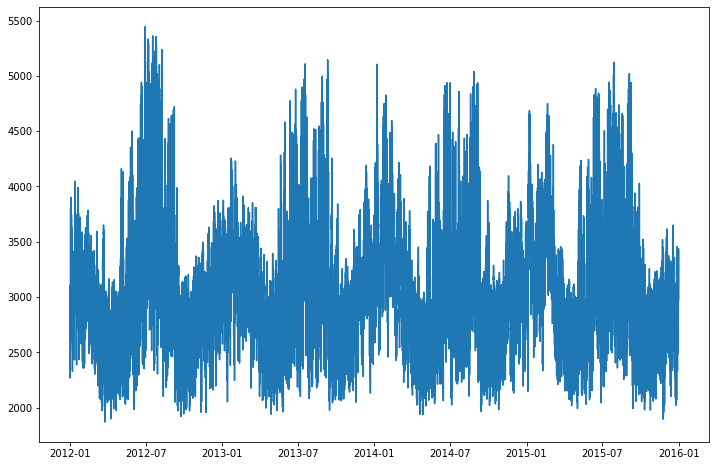

In [21]:
plt.figure(figsize=(12,8))
plt.plot(df.set_index(['ds']))

As my data has many row, I converted my data in daily power used from hourly power used

In [22]:
df['ds'] = df['ds'].dt.date
df = df.groupby('ds').agg(np.sum)
df.reset_index(level=0, inplace=True)
df.head()

,ds,y
0,2012-01-01,60488
1,2012-01-02,76317
2,2012-01-03,84081
3,2012-01-04,83293
4,2012-01-05,77043


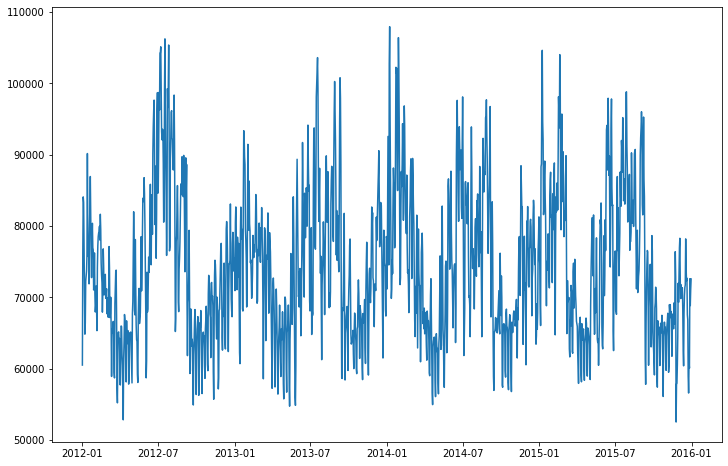

In [23]:
plt.figure(figsize=(12,8))
plt.plot(df.set_index(['ds']))

Now, we will create an instance "model" of Prophet model and fit our dataframe(df) init.

In [24]:
model=Prophet()

In [25]:
model.fit(df)

INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [26]:
model.component_modes

{'additive': ['yearly',
  'weekly',
  'additive_terms',
  'extra_regressors_additive',
  'holidays'],
 'multiplicative': ['multiplicative_terms', 'extra_regressors_multiplicative']}

The next step is to prepare our model to make future predictions. This is achieved using the model.make_future_dataframe (model is Prophet instance) method and passing the number of days we’d like to predict in the future. We use the periods attribute to specify this. This also include the historical dates. We’ll use these historical dates to compare the predictions with the actual values in the ds column.

In [27]:
### Create future dates of 365 days
future_dates=model.make_future_dataframe(periods=365)

In [28]:
future_dates.tail()

,ds
1821,2016-12-26
1822,2016-12-27
1823,2016-12-28
1824,2016-12-29
1825,2016-12-30


We use the predict method to make future predictions. This will generate a dataframe with a yhat column that will contain the predictions.

In [29]:
prediction=model.predict(future_dates)

If we check the head for our forecast dataframe we’ll notice that it has very many columns. However, we are mainly interested in ds, yhat, yhat_lower and yhat_upper. yhat is our predicted forecast, yhat_lower is the lower bound for our predictions and yhat_upper is the upper bound for our predictions.

In [30]:
prediction.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2012-01-01,68165.707556,54956.049133,71746.736561,68165.707556,68165.707556,-4735.282157,-4735.282157,-4735.282157,-6052.927558,-6052.927558,-6052.927558,1317.645401,1317.645401,1317.645401,0.0,0.0,0.0,63430.425399
1,2012-01-02,68208.014437,62980.911444,79755.396944,68208.014437,68208.014437,3389.122955,3389.122955,3389.122955,1683.670675,1683.670675,1683.670675,1705.452280,1705.452280,1705.452280,0.0,0.0,0.0,71597.137393
2,2012-01-03,68250.321319,65265.510499,80943.568072,68250.321319,68250.321319,4825.016438,4825.016438,4825.016438,2700.728041,2700.728041,2700.728041,2124.288397,2124.288397,2124.288397,0.0,0.0,0.0,73075.337758
3,2012-01-04,68292.628201,65276.947693,82381.109334,68292.628201,68292.628201,5298.096953,5298.096953,5298.096953,2727.843702,2727.843702,2727.843702,2570.253251,2570.253251,2570.253251,0.0,0.0,0.0,73590.725155
4,2012-01-05,68334.935083,65956.571231,81809.312212,68334.935083,68334.935083,5608.002225,5608.002225,5608.002225,2569.369390,2569.369390,2569.369390,3038.632835,3038.632835,3038.632835,0.0,0.0,0.0,73942.937308


### Plotting the Forecasts
 
Prophet has an inbuilt feature that enables us to plot the forecasts we just generated. This is achieved using mode.plot() and passing in our forecasts as the argument. The blue line in the graph represents the predicted values while the black dots represents the data in our dataset

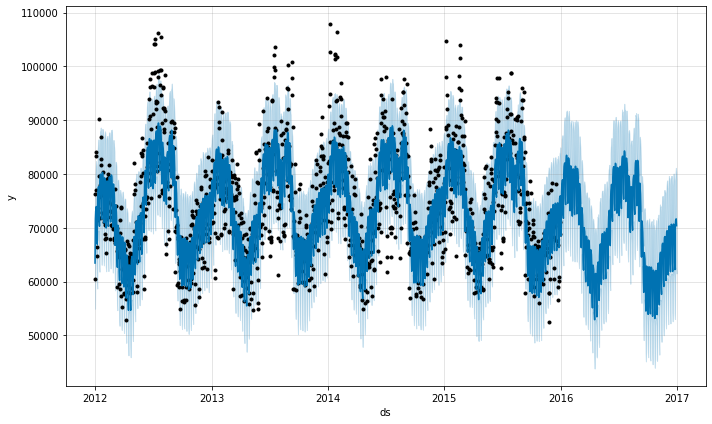

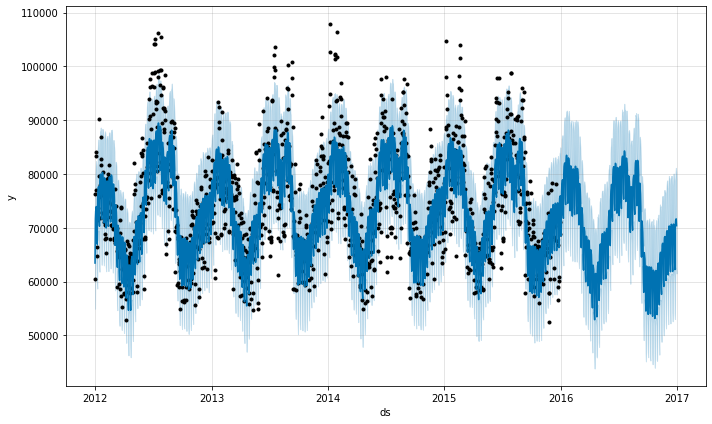

In [31]:
model.plot(prediction)

### Plotting the Forecast Components
 
The plot_components method plots the trend, yearly and weekly seasonality of the time series data

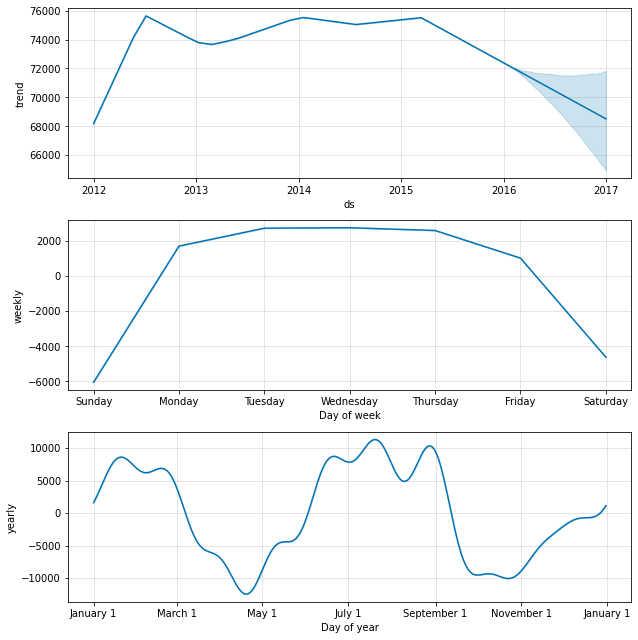

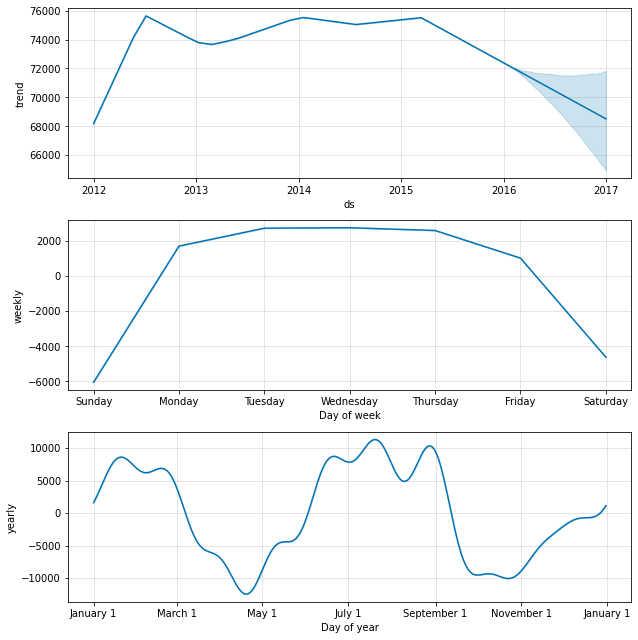

In [32]:
model.plot_components(prediction)

### Cross Validation
 
Next let’s measure the forecast error using the historical data. We’ll do this by comparing the predicted values with the actual values. In order to perform this operation we select cut of points in the history of the data and fit the model with data upto that cut off point. Afterwards we compare the actual values to the predicted values. The cross_validation method allows us to do this in Prophet. This method take the following parameters as explained below:

    horizon the forecast horizon
    initial the size of the initial training period
    period the spacing between cutoff dates
The output of the cross_validation method is a dataframe containing y the true values and yhat the predicted values. We’ll use this dataframe to compute the prediction errors

In [33]:
from fbprophet.diagnostics import cross_validation
df_cv = cross_validation(model, initial='730 days', period='180 days', horizon = '365 days')
df_cv.head()

INFO:fbprophet:Making 3 forecasts with cutoffs between 2014-01-05 00:00:00 and 2014-12-31 00:00:00


,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2014-01-06,81137.253718,73513.640398,89407.524111,102756,2014-01-05
1,2014-01-07,82785.217483,74971.201334,90465.956832,107961,2014-01-05
2,2014-01-08,83923.397458,75965.256160,92076.179987,94934,2014-01-05
3,2014-01-09,84233.086494,76342.656248,92281.673770,86004,2014-01-05
4,2014-01-10,83020.438002,74921.235522,91017.269397,78448,2014-01-05


### Performance Metrics
 
We use the performance_metrics utility to compute the Mean Squared Error(MSE), Root Mean Squared Error(RMSE),Mean Absolute Error(MAE), Mean Absolute Percentage Error(MAPE) and the coverage of the the yhat_lower and yhat_upper estimates

In [34]:
from fbprophet.diagnostics import performance_metrics
df_p = performance_metrics(df_cv)
df_p.head()

,horizon,mse,rmse,mae,mape,mdape,coverage
0,37 days,8.943993e+07,9457.268881,7310.074376,0.089723,0.068594,0.663609
1,38 days,8.358853e+07,9142.676321,7128.247658,0.087600,0.068594,0.663609
2,39 days,8.107443e+07,9004.134139,6999.415322,0.086517,0.067423,0.666667
3,40 days,8.077649e+07,8987.574293,6975.011105,0.086271,0.068594,0.669725
4,41 days,7.983528e+07,8935.059147,6880.554413,0.085157,0.067423,0.675841


In [35]:
df_p.head()

,horizon,mse,rmse,mae,mape,mdape,coverage
0,37 days,8.943993e+07,9457.268881,7310.074376,0.089723,0.068594,0.663609
1,38 days,8.358853e+07,9142.676321,7128.247658,0.087600,0.068594,0.663609
2,39 days,8.107443e+07,9004.134139,6999.415322,0.086517,0.067423,0.666667
3,40 days,8.077649e+07,8987.574293,6975.011105,0.086271,0.068594,0.669725
4,41 days,7.983528e+07,8935.059147,6880.554413,0.085157,0.067423,0.675841


### Visualizing Performance Metrics
 
The performance Metrics can be visualized using the plot_cross_validation_metric utility. Let’s visualize the RMSE below.

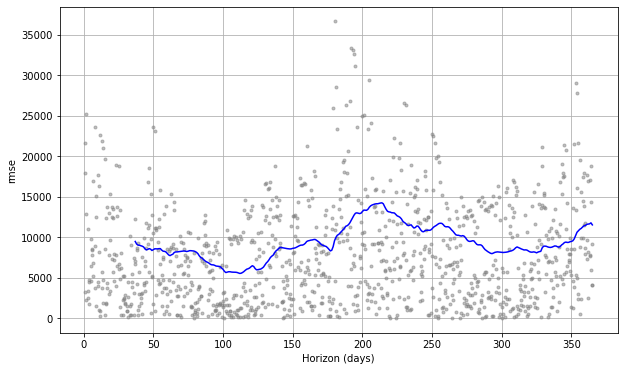

In [36]:
from fbprophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_cv, metric='rmse')

## Conclusion

Prophet is the most easy model as we do not need to handel is the Stationerity of data and the seasonal and cyclic component of time series data, with respect to a date format column or datatype as date column as this model take care of this, in this model we just need to visualize the data and provide the parameters as per the visualization of the data.